<a href="https://colab.research.google.com/github/jmins33/Pandas/blob/master/3starscard/3starscard_%EC%97%85%EC%A2%85%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Google Drive 연동

In [ ]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'My Drive/3starcard'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

In [ ]:
%cd "{PROJECT_PATH}"
!ls

/content/drive/My Drive/3starcard
'[기타] SCDC_공모전 테이블 설명.xlsx'  '[Track1_데이터4] variable_dtype.xlsx'
'[Track1_데이터1] mrc_info.csv'        '[Track2_데이터1] trend_w_demo.csv'
'[Track1_데이터2] samp_train.csv'      '[Track2_데이터2] 업종_예시.xlsx'
'[Track1_데이터3] samp_cst_feat.csv'


## 데이터 불러오기
- 2019년 2020년 업종 비교
- 2019년 2020년, 각 월 카드 사용량 비교

In [ ]:
trend = pd.read_csv('[Track2_데이터1] trend_w_demo.csv', encoding='CP949')

In [ ]:
# 2019년 데이터
s2019 = trend.loc[210468:]
s2019

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
210468,201905,전문몰,1,E,low,low,low,low,low,mid
210469,201905,전문몰,1,E,mid,mid,low,low,low,mid
210470,201905,할인점,1,F,high,low,mid,mid,mid,mid
210471,201905,전문몰,0,G,high,low,mid,mid,mid,low
210472,201905,전문몰,1,H,high,low,low,low,mid,mid
...,...,...,...,...,...,...,...,...,...,...
452033,201904,전문몰,0,E,low,mid,low,low,low,low
452034,201904,할인점,0,H,high,low,low,low,low,low
452035,201904,할인점,1,H,high,low,low,low,low,low
452036,201904,할인점,0,H,high,low,low,low,low,low


In [ ]:
# 2020년 데이터
s2020 = trend.loc[:210467]
s2020

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,할인점,0,F,high,low,high,mid,low,low
1,202005,취미,0,B,high,low,mid,mid,low,low
2,202005,오픈마켓/소셜,1,D,mid,mid,mid,mid,low,mid
3,202005,뷰티,0,D,mid,mid,mid,mid,low,low
4,202005,오픈마켓/소셜,0,G,high,low,mid,mid,mid,low
...,...,...,...,...,...,...,...,...,...,...
210463,202004,오픈마켓/소셜,1,D,mid,mid,low,mid,low,mid
210464,202004,전문몰,1,D,mid,mid,low,mid,low,low
210465,202004,오픈마켓/소셜,0,C,mid,mid,high,low,low,low
210466,202004,할인점,0,F,high,low,mid,mid,mid,low


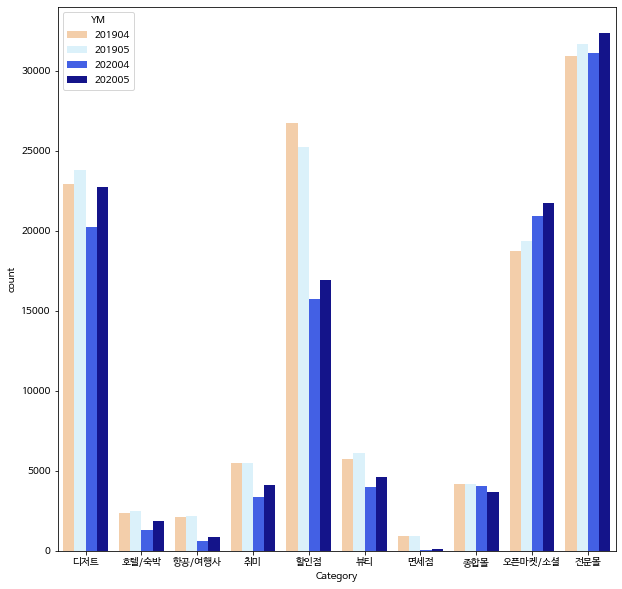

In [169]:
f, ax = plt.subplots(figsize=(10,10))
sns.countplot(x="Category", hue="YM", palette='flag', data=trend, order=['디저트', '호텔/숙박', '항공/여행사', '취미', '할인점', '뷰티', '면세점', '종합몰', '오픈마켓/소셜', '전문몰'])

- **2020년이 2019년보다 신용카드 이용건수가 31,102 건이 줄었음**
- 241570 - 210468 = 31102

- 디저트 : 2020년 04월보다 05월에 사용량 늘어남

- 자세히 보기 위해 같은 달로 묶기
 + 4월(s04)과 5월(s05)

In [ ]:
s201904 = trend[trend.YM==201904]
s201905 = trend[trend.YM==201905]
s202004 = trend[trend.YM==202004]
s202005 = trend[trend.YM==202005]

In [ ]:
s04 = pd.concat([s201904,s202004])
s04

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
331919,201904,할인점,0,H,high,low,low,low,low,low
331920,201904,할인점,0,E,low,low,low,low,low,low
331921,201904,할인점,1,A,high,low,mid,mid,low,mid
331922,201904,전문몰,1,D,high,mid,high,mid,low,high
331923,201904,취미,0,F,high,mid,high,mid,mid,low
...,...,...,...,...,...,...,...,...,...,...
210463,202004,오픈마켓/소셜,1,D,mid,mid,low,mid,low,mid
210464,202004,전문몰,1,D,mid,mid,low,mid,low,low
210465,202004,오픈마켓/소셜,0,C,mid,mid,high,low,low,low
210466,202004,할인점,0,F,high,low,mid,mid,mid,low


In [ ]:
s05 = pd.concat([s201905,s202005])
s05

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
210468,201905,전문몰,1,E,low,low,low,low,low,mid
210469,201905,전문몰,1,E,mid,mid,low,low,low,mid
210470,201905,할인점,1,F,high,low,mid,mid,mid,mid
210471,201905,전문몰,0,G,high,low,mid,mid,mid,low
210472,201905,전문몰,1,H,high,low,low,low,mid,mid
...,...,...,...,...,...,...,...,...,...,...
109089,202005,전문몰,1,F,high,low,mid,mid,low,mid
109090,202005,할인점,1,A,high,low,mid,mid,low,mid
109091,202005,디저트,1,H,high,low,low,low,low,mid
109092,202005,오픈마켓/소셜,1,A,high,low,mid,mid,low,mid


- seaborn 한글

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

- 신용카드 건수 달 비교

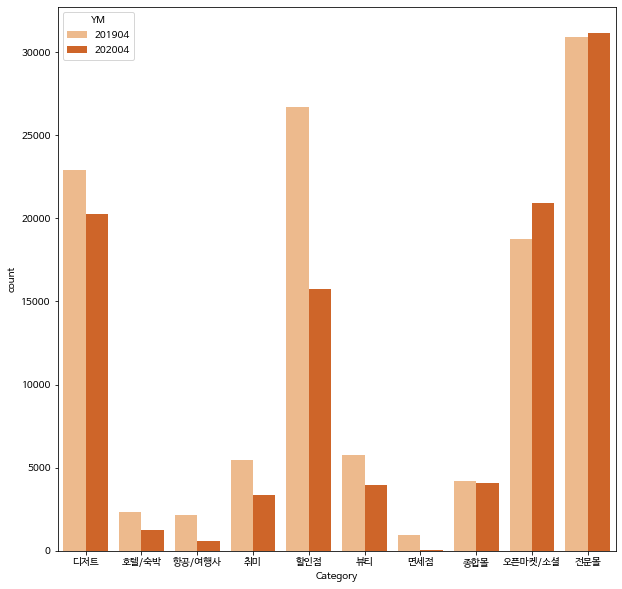

In [ ]:
# 04월 비교
f, ax = plt.subplots(figsize=(10,10))
sns.countplot(x="Category", hue="YM", palette='Oranges', data=s04, order=['디저트', '호텔/숙박', '항공/여행사', '취미', '할인점', '뷰티', '면세점', '종합몰', '오픈마켓/소셜', '전문몰'])

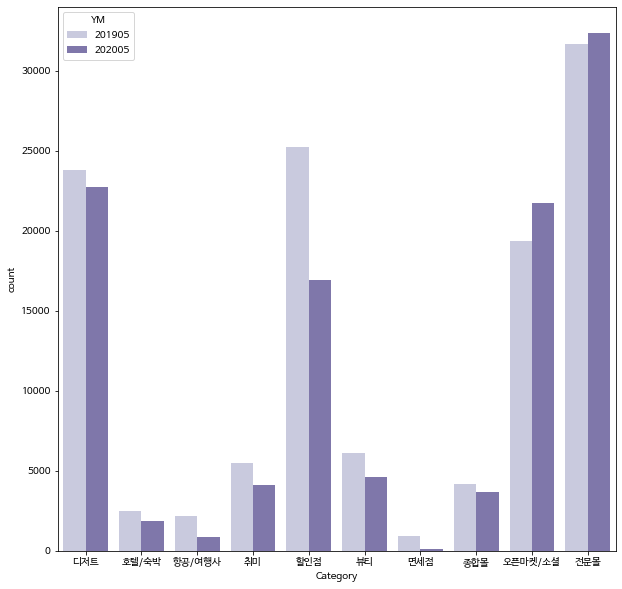

In [ ]:
# 05월 비교
f, ax = plt.subplots(figsize=(10,10))
sns.countplot(x="Category", hue="YM", palette='Purples', data=s05, order=['디저트', '호텔/숙박', '항공/여행사', '취미', '할인점', '뷰티', '면세점', '종합몰', '오픈마켓/소셜', '전문몰'])

- 2019년과 대비하여 신용카드 이용 건수 줄어든 업종
 + 디저트, 호텔/숙박, 항공/여행사, 취미, 할인점, 뷰티, 면세점, 종합몰
- 2019년과 대비하여 신용카드 이용 건수 늘어난 업종
 + 오픈마켓/소셜, 전문몰

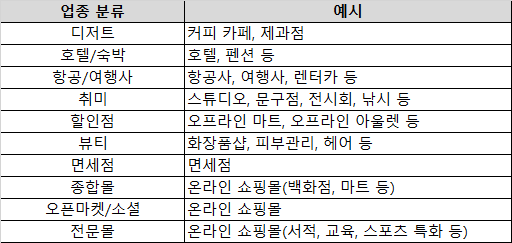

- *업종 예시 데이터에는 항공/여행상품 이라고 기재되어 있으나, 주어진 csv파일에는 항공/여행사로 기재되어 있음

- 하락세가 큰 업종은 할인점 (오프라인 마트, 아울렛 등)
- 상승세가 큰 업종은 오픈마켓/소셜 (온라인 쇼핑몰)

- 코로나의 여파로 인하여 사람들이 오프라인을 꺼리고 온라인을 선호하게 되었다.